<h1>Screen time and mental health</h1>

<h3>(Struktur rekken)Data Description, Analysis, Results, Conclusion</h3>

##Intorduction

##Data collection and description

##Load necessary libraries

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# Load the dataset
df = pd.read_csv('mental_health_and_technology_usage_2024.csv')
df.head()  # Display the first few rows of the dataset

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


#Checking missing values

In [45]:
# Check for null values in the entire DataFrame
df.isnull().sum()
# Get a concise summary of the DataFrame, including null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  object 
dtypes: floa

In [46]:
# Interpolate null values linearly
df_interpolated = df.interpolate()
df.isnull().sum()
df.head()

/var/folders/7y/xzrzlk5s2_v0mw8959bk51_40000gn/T/ipykernel_18806/1833537714.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate()


,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


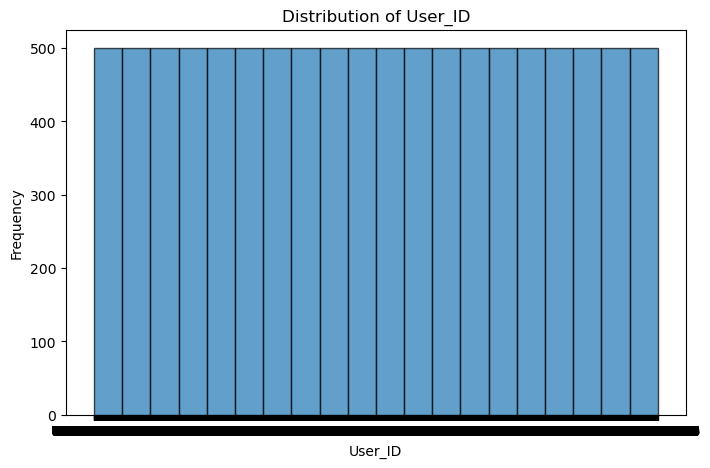

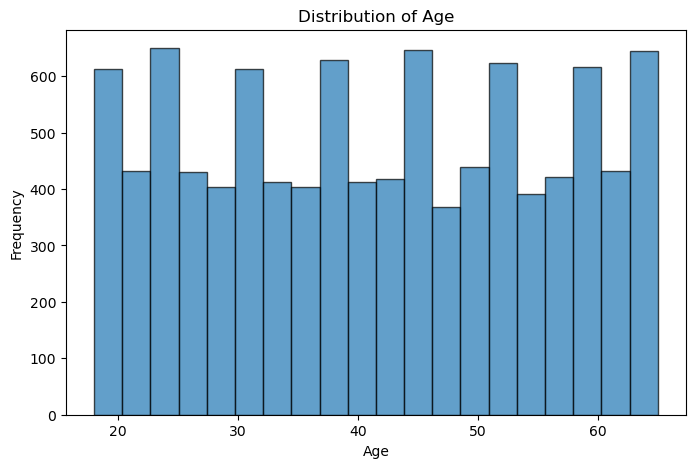

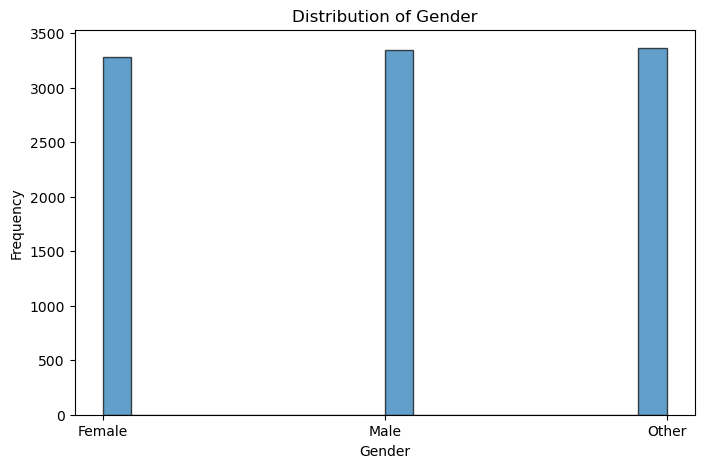

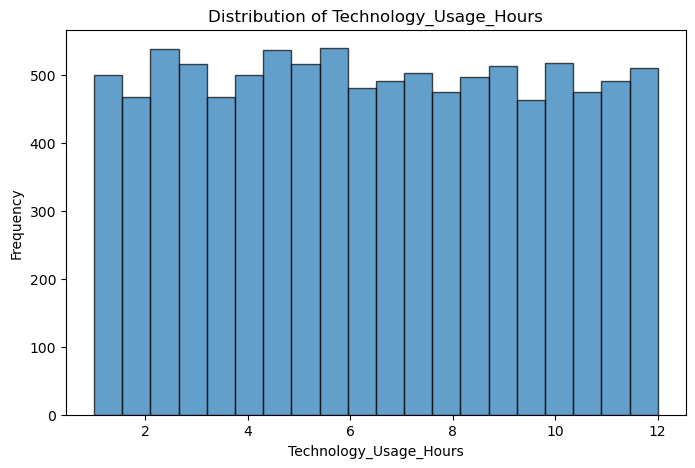

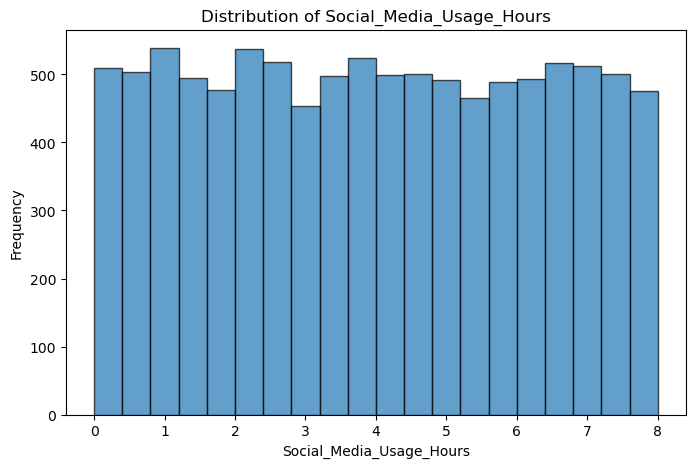

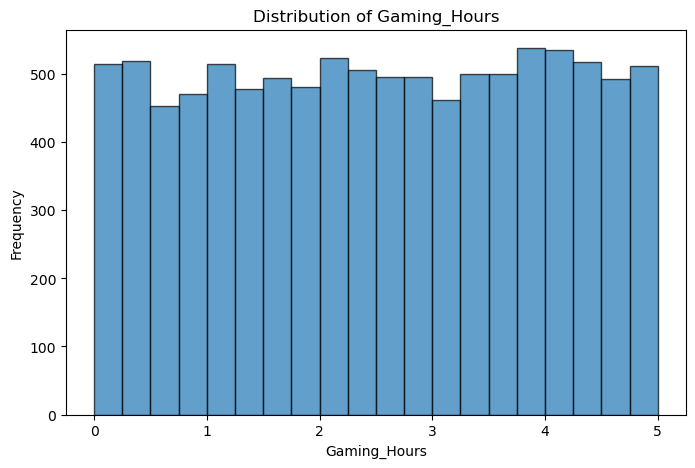

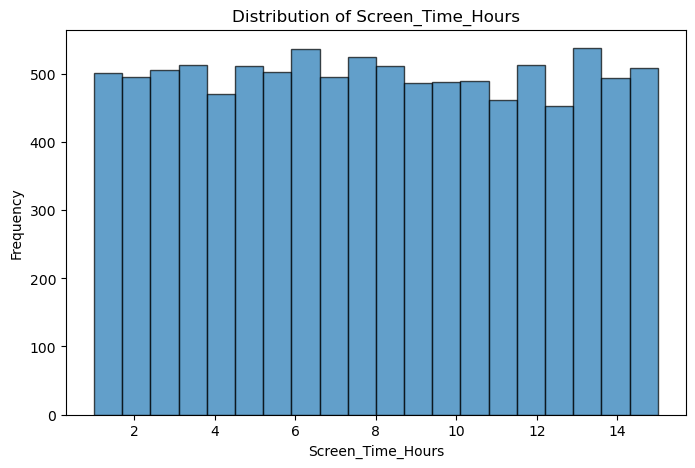

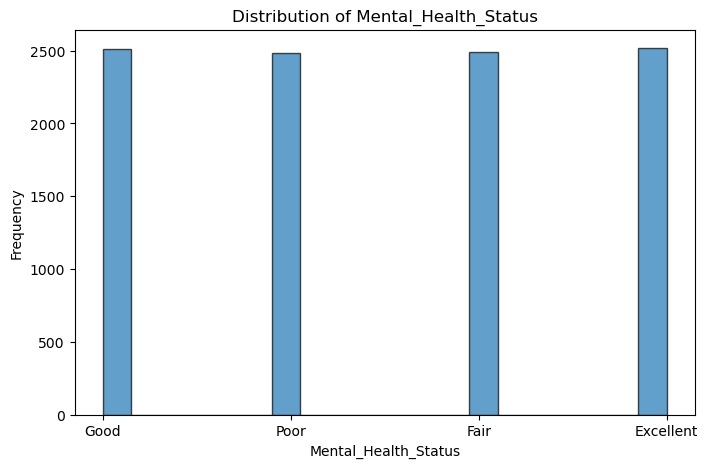

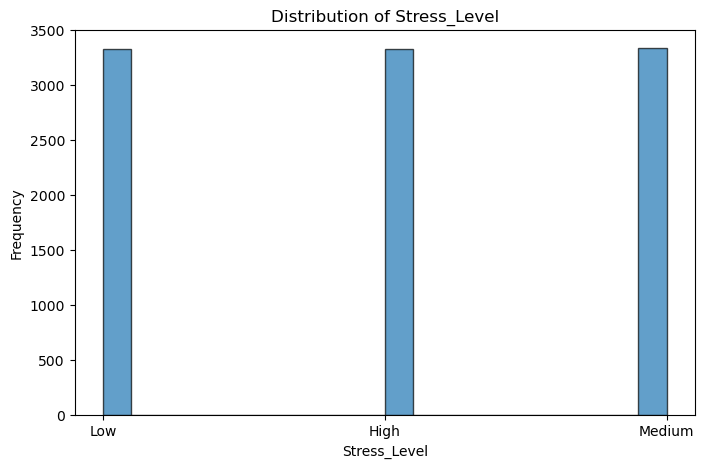

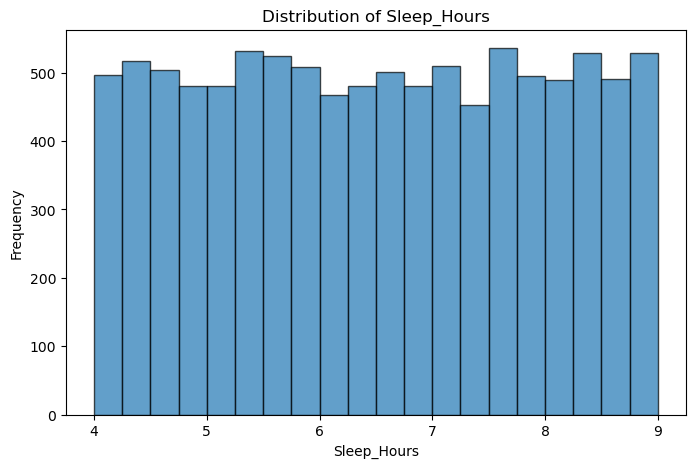

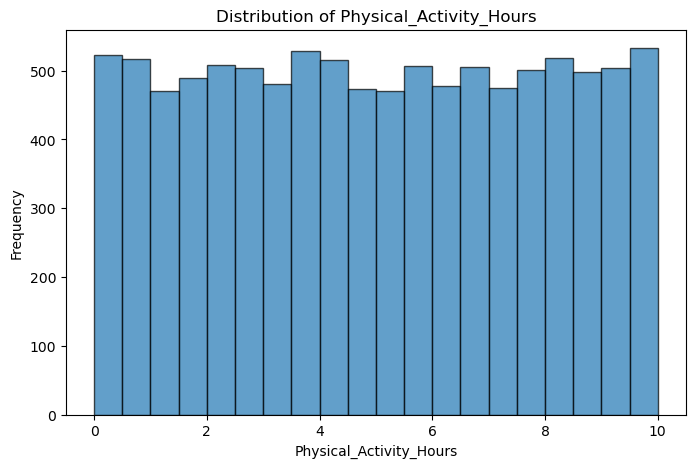

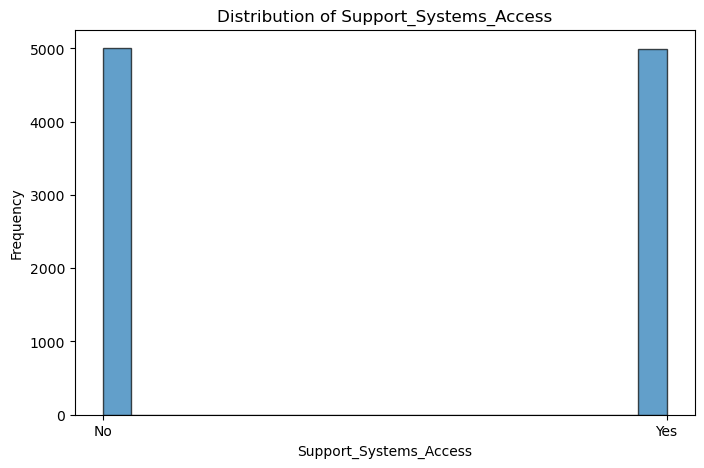

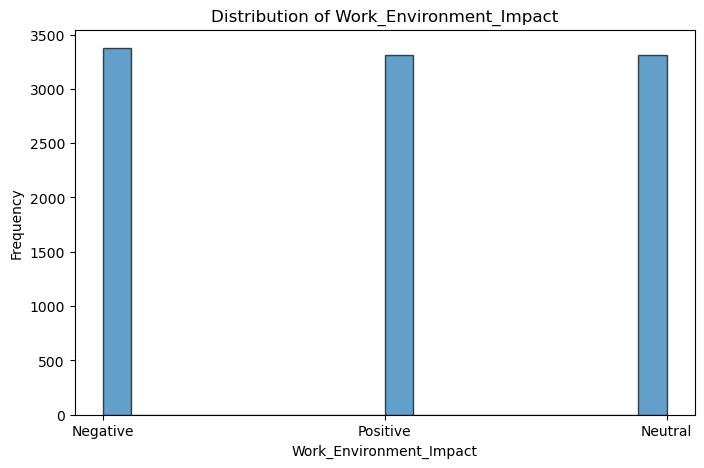

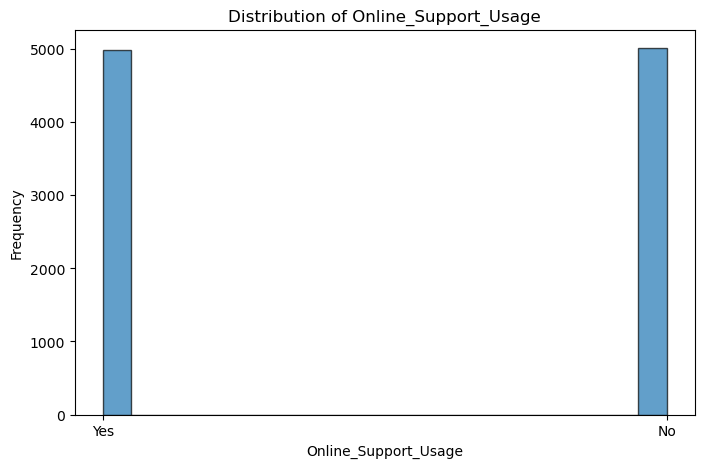

In [47]:
features = [
    'User_ID', 'Age', 'Gender', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours',
    'Gaming_Hours', 'Screen_Time_Hours', 'Mental_Health_Status', 'Stress_Level',
    'Sleep_Hours', 'Physical_Activity_Hours', 'Support_Systems_Access',
    'Work_Environment_Impact', 'Online_Support_Usage'
]

# Plot histograms for each feature
for feature in features:
    plt.figure(figsize=(8, 5))
    plt.hist(df[feature].dropna(), bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


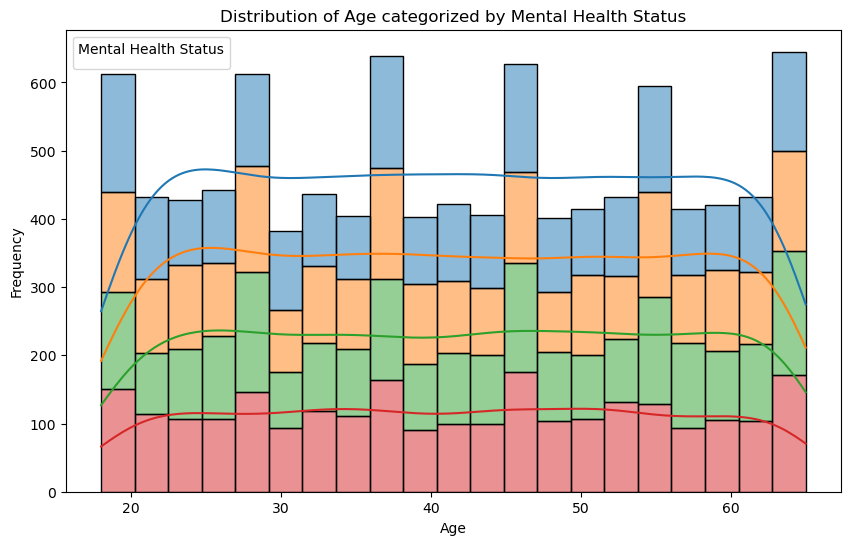

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


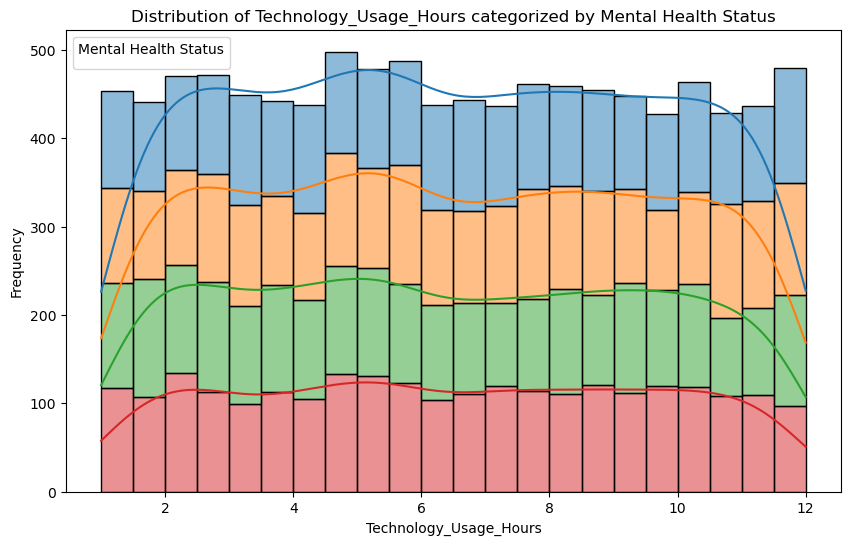

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


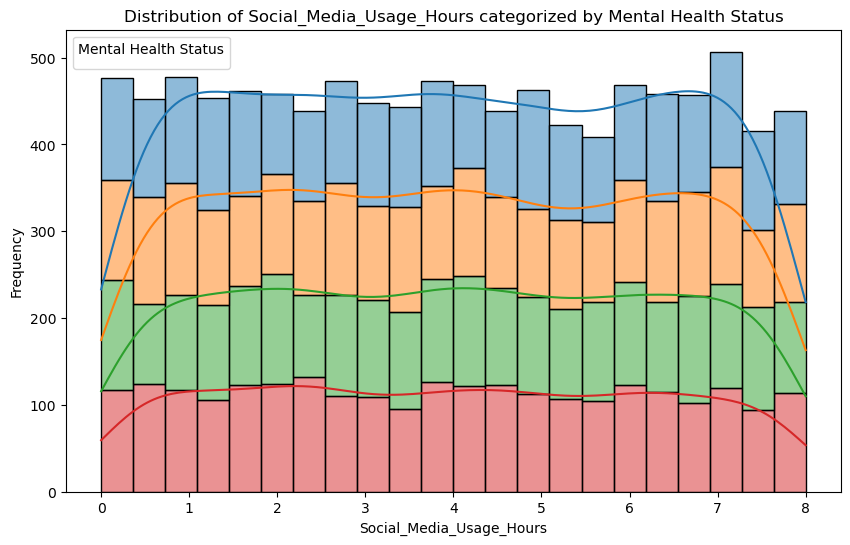

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


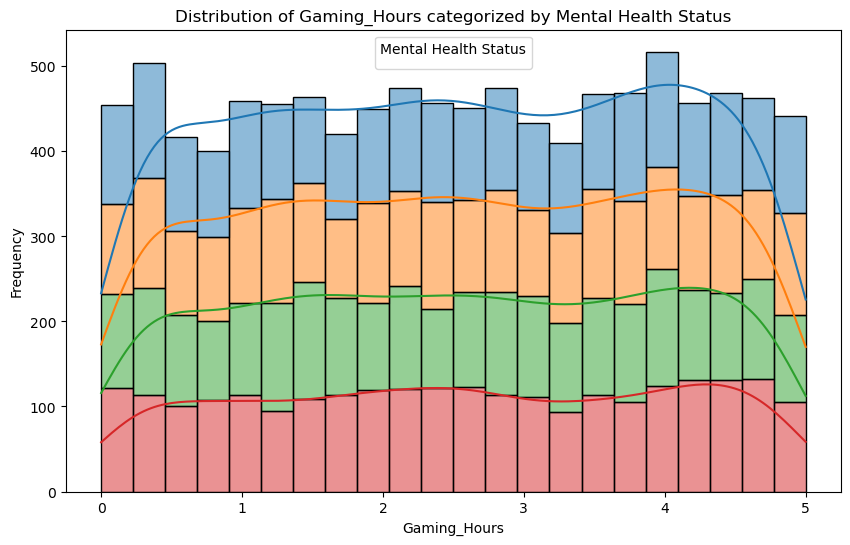

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


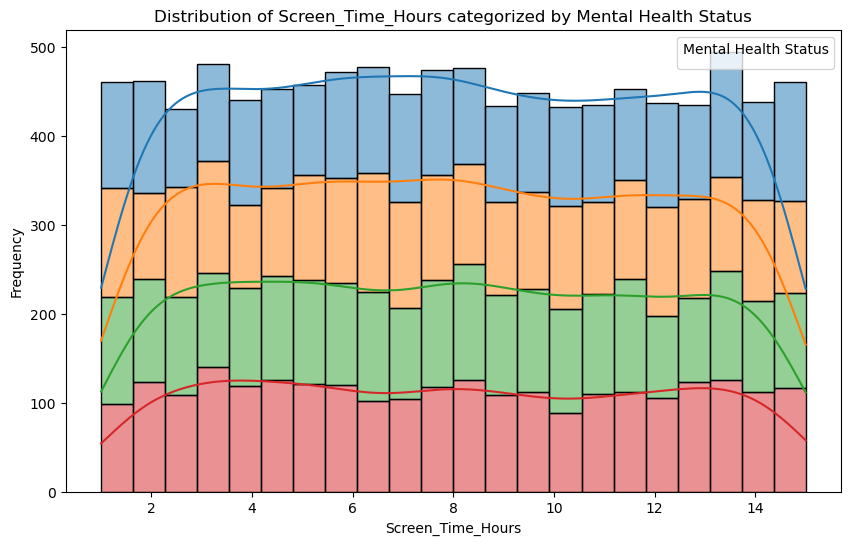

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


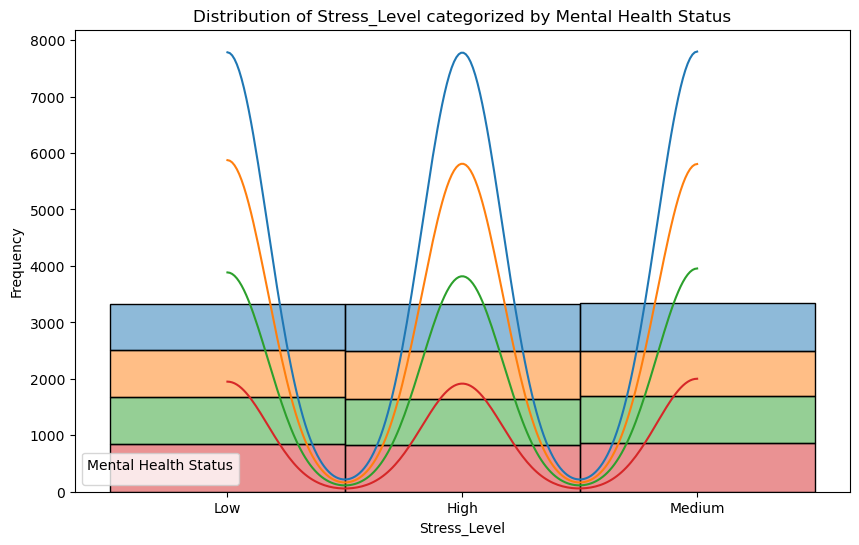

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


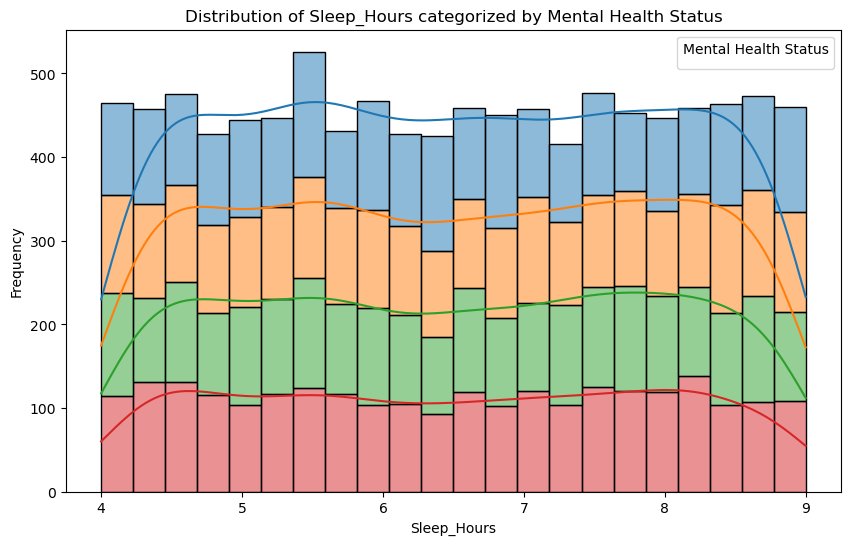

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


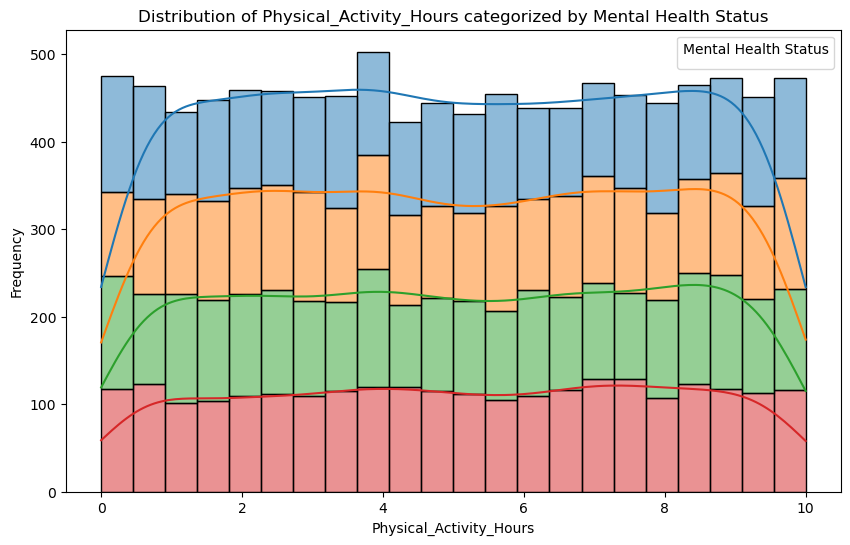

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


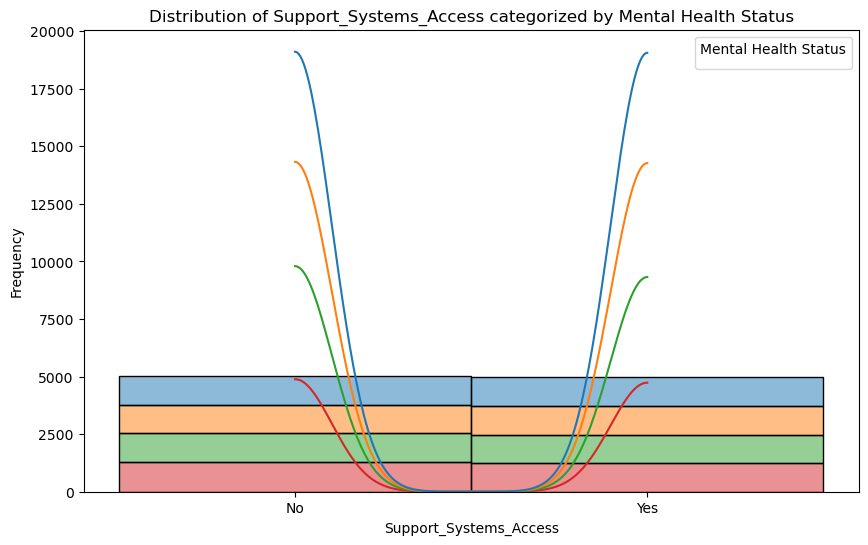

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


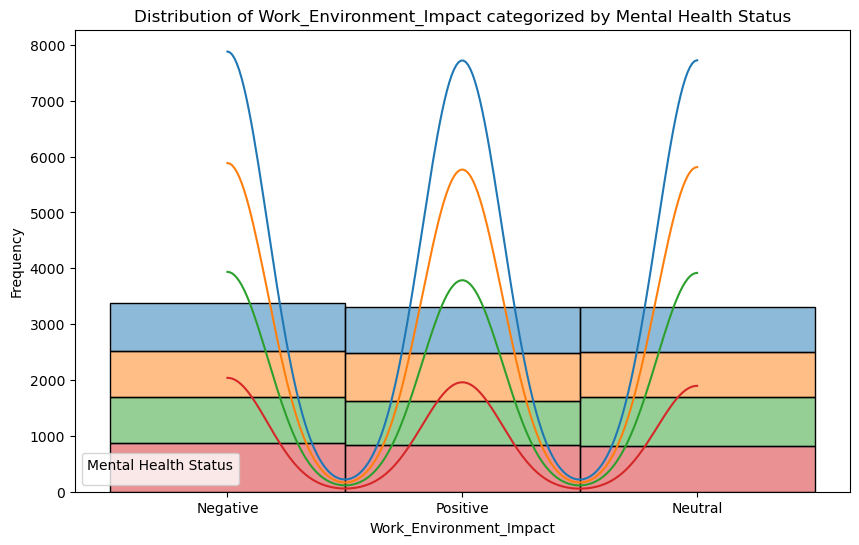

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


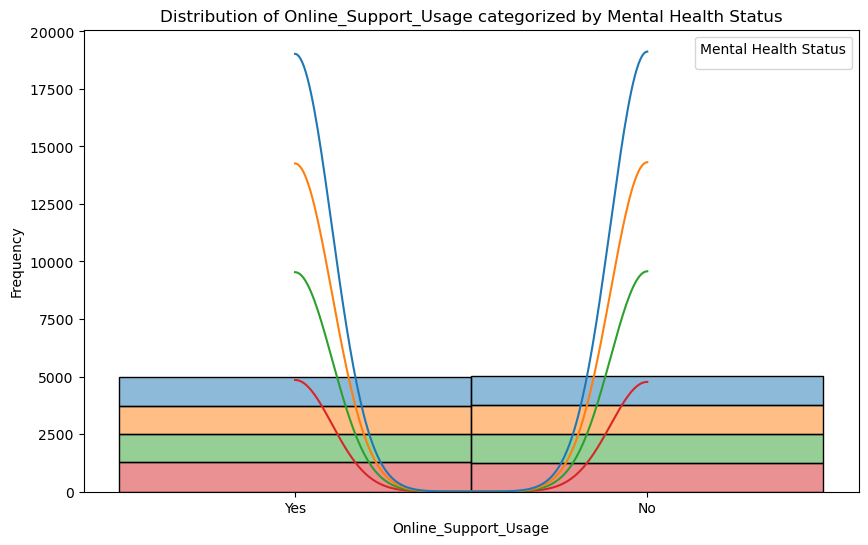

In [48]:


# List of numerical features to plot
features = [
    'Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours',
    'Gaming_Hours', 'Screen_Time_Hours', 'Stress_Level', 'Sleep_Hours',
    'Physical_Activity_Hours', 'Support_Systems_Access', 'Work_Environment_Impact', 
    'Online_Support_Usage'
]

# Loop through features and create histograms categorized by Mental_Health_Status
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df, x=feature, hue='Mental_Health_Status', multiple='stack', kde=True)
    plt.title(f'Distribution of {feature} categorized by Mental Health Status')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Mental Health Status')
    plt.show()


In [49]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Drop the User_ID column
data = df.drop(columns=['User_ID'])

# Convert categorical columns to numeric
categorical_columns = [
    'Gender', 'Mental_Health_Status', 'Stress_Level', 
    'Support_Systems_Access', 'Work_Environment_Impact', 'Online_Support_Usage'
]

# Use LabelEncoder for binary categorical columns or columns with few unique values
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])

# List of columns to normalize
features_to_normalize = [
    'Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours',
    'Gaming_Hours', 'Screen_Time_Hours', 'Sleep_Hours', 
    'Physical_Activity_Hours'
]

# Initialize the scaler
scaler = StandardScaler()

# Normalize the selected numeric features
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

# Display the first few rows of the normalized data
print(data.head())


        Age  Gender  Technology_Usage_Hours  Social_Media_Usage_Hours  \
0 -1.330405       0                0.030187                  0.876421   
1 -1.474088       1               -1.093244                 -0.606123   
2  0.681159       1               -1.083777                  0.936933   
3 -1.186722       0               -0.831320                  0.219433   
4  0.824842       1               -1.664426                 -1.474902   

   Gaming_Hours  Screen_Time_Hours  Mental_Health_Status  Stress_Level  \
0     -1.268838           1.084561                     2             1   
1      0.846355          -0.090482                     3             0   
2     -0.867919          -1.191312                     1             0   
3      0.051430           1.262673                     0             2   
4     -1.538422           1.151353                     2             1   

   Sleep_Hours  Physical_Activity_Hours  Support_Systems_Access  \
0     1.040263                 0.587332          

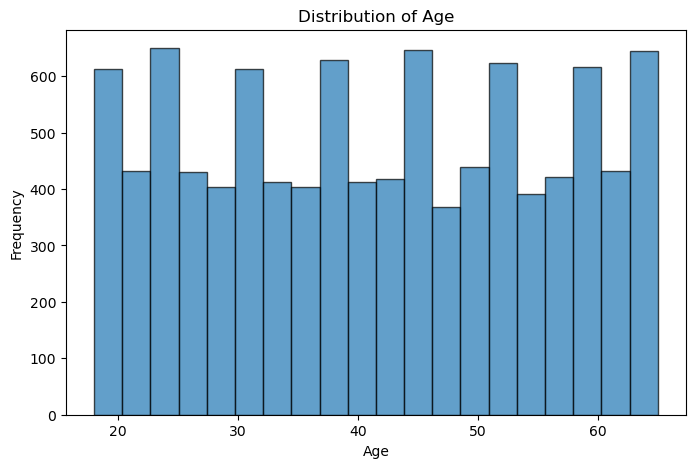

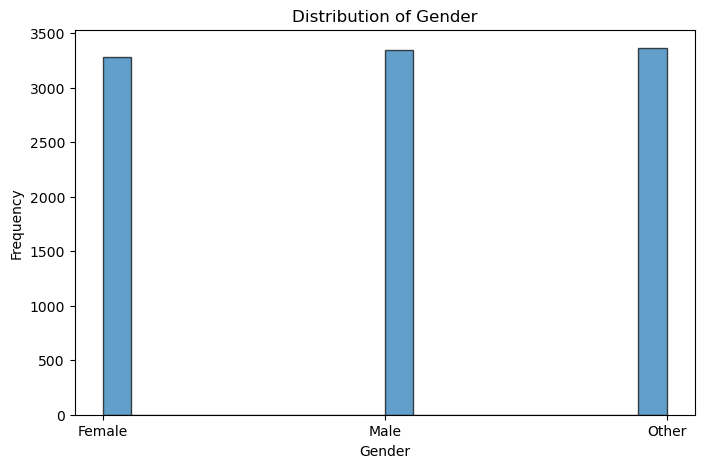

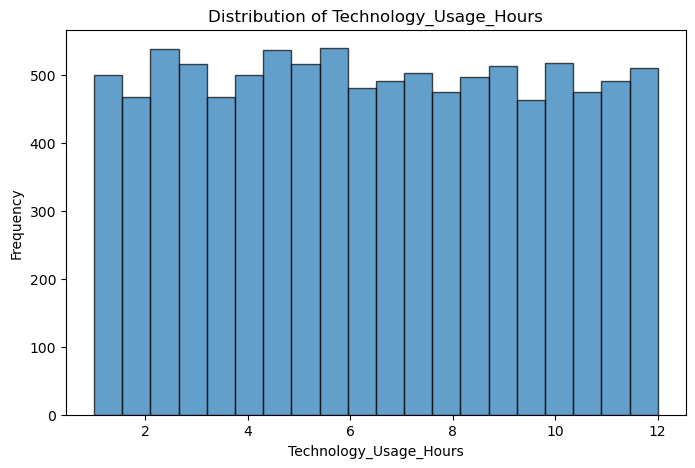

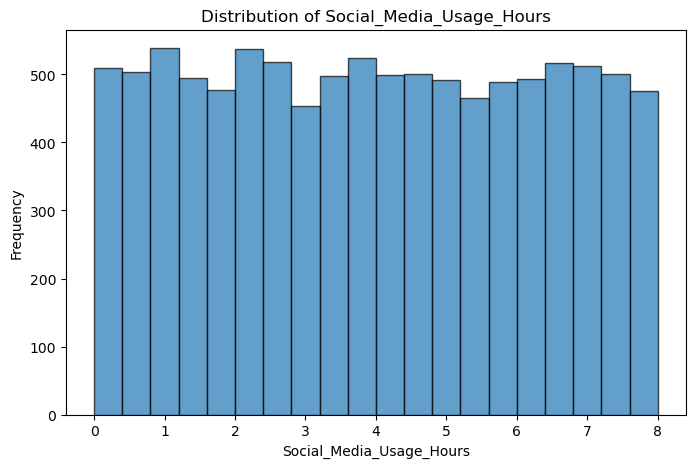

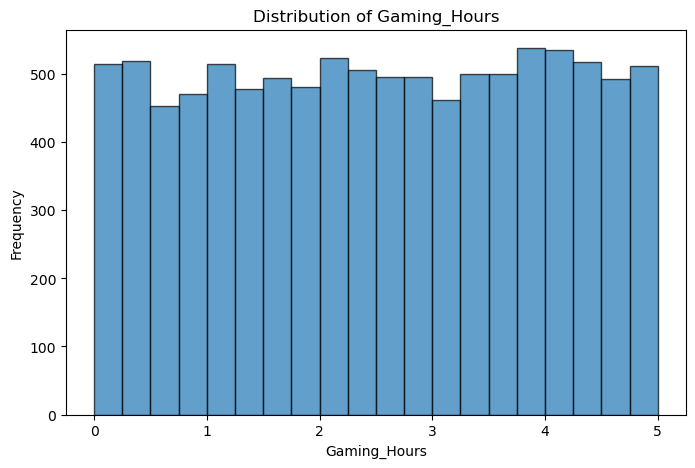

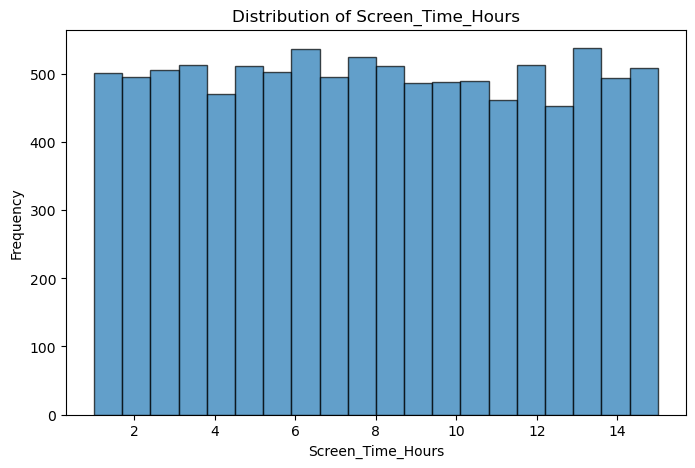

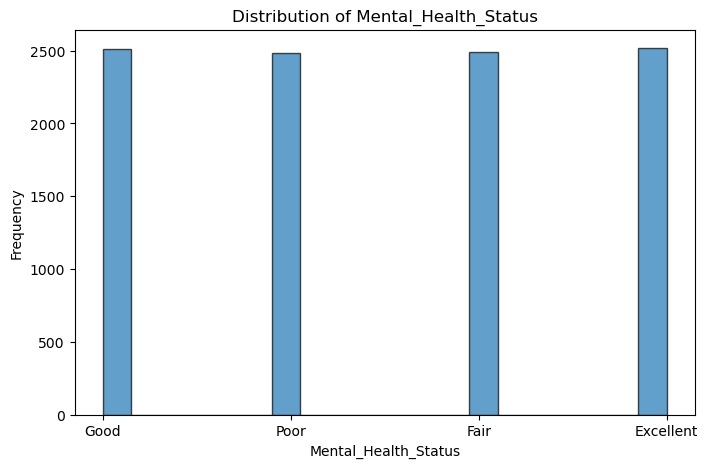

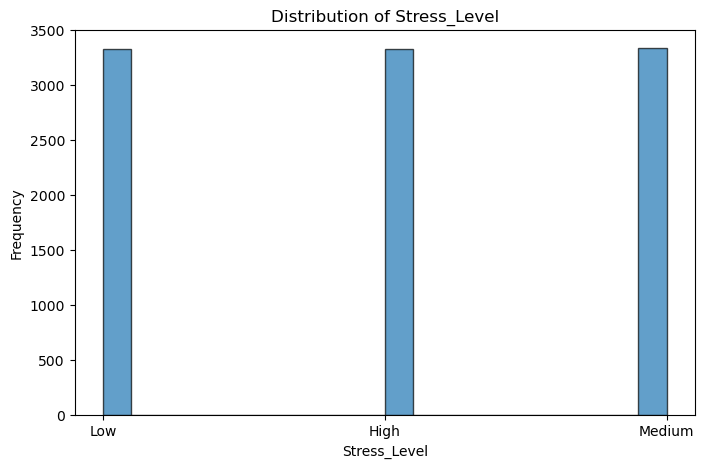

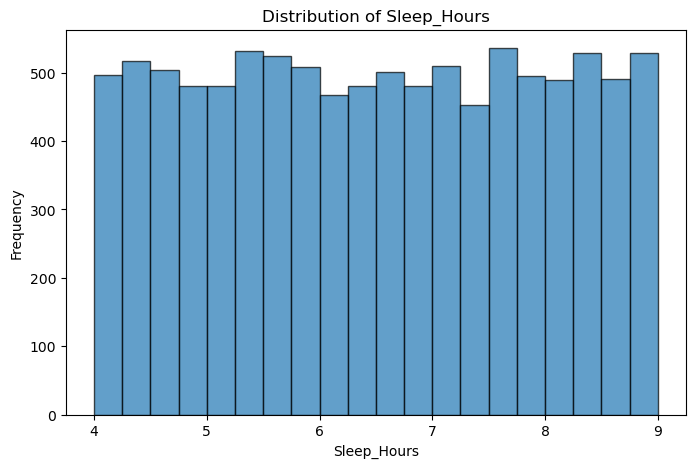

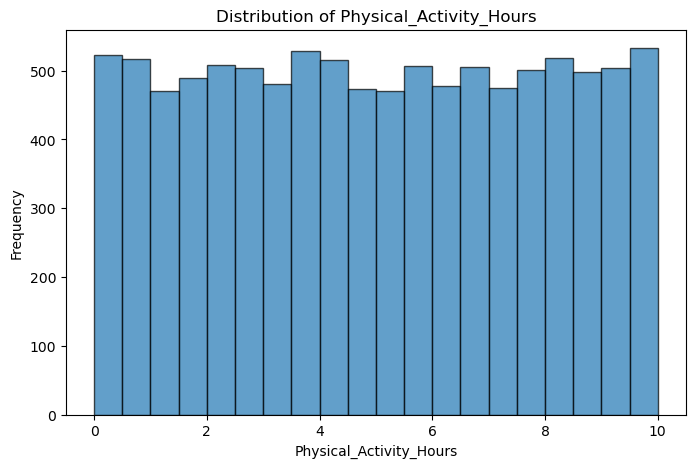

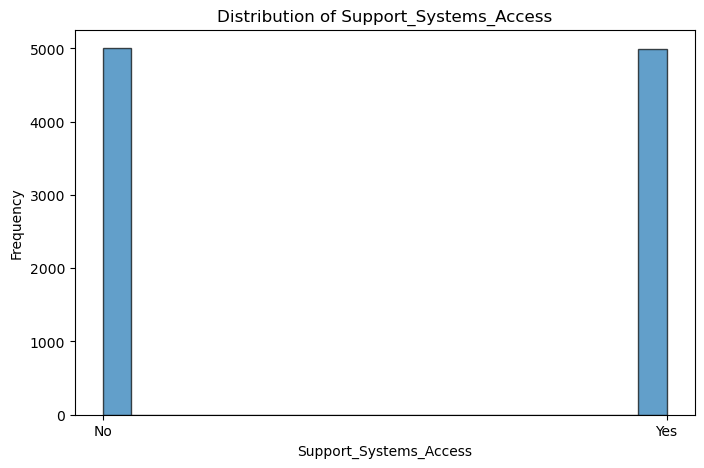

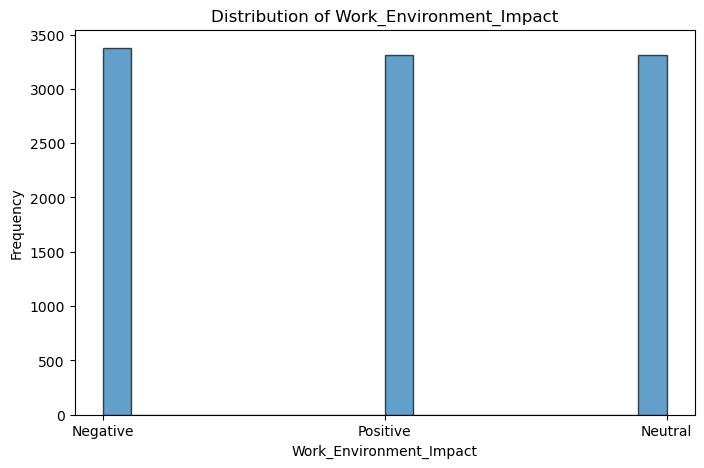

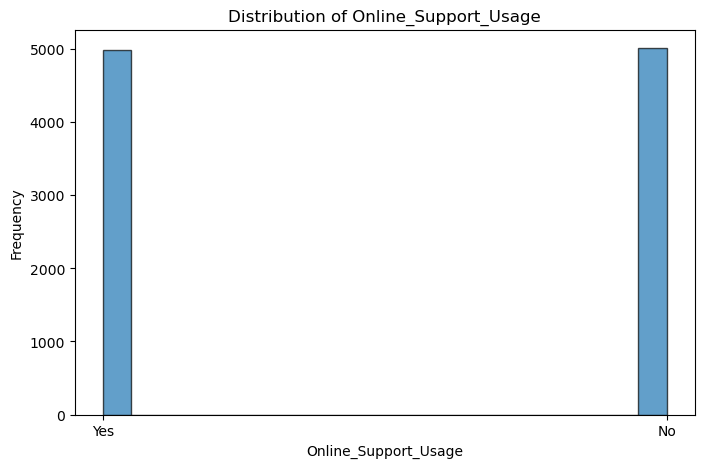

In [50]:
features = [
    'Age', 'Gender', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours',
    'Gaming_Hours', 'Screen_Time_Hours', 'Mental_Health_Status', 'Stress_Level',
    'Sleep_Hours', 'Physical_Activity_Hours', 'Support_Systems_Access',
    'Work_Environment_Impact', 'Online_Support_Usage'
]

# Plot histograms for each feature
for feature in features:
    plt.figure(figsize=(8, 5))
    plt.hist(df[feature].dropna(), bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


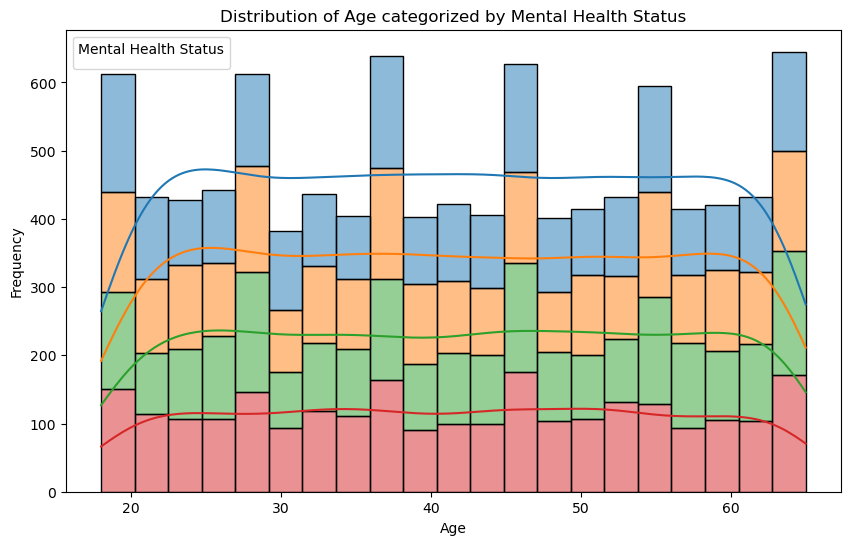

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


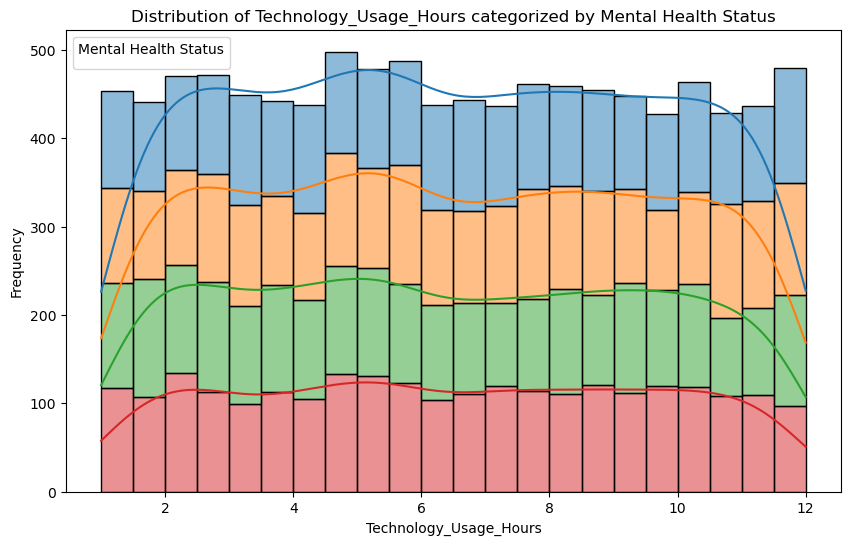

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


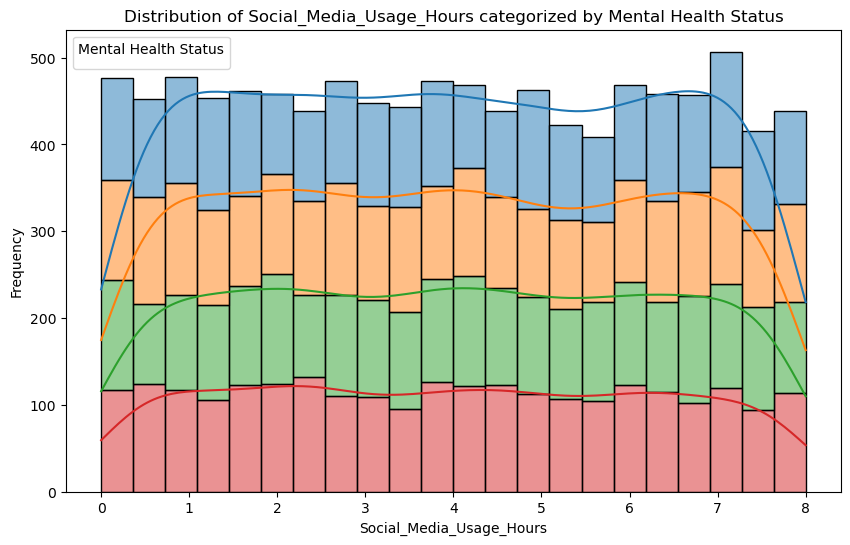

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


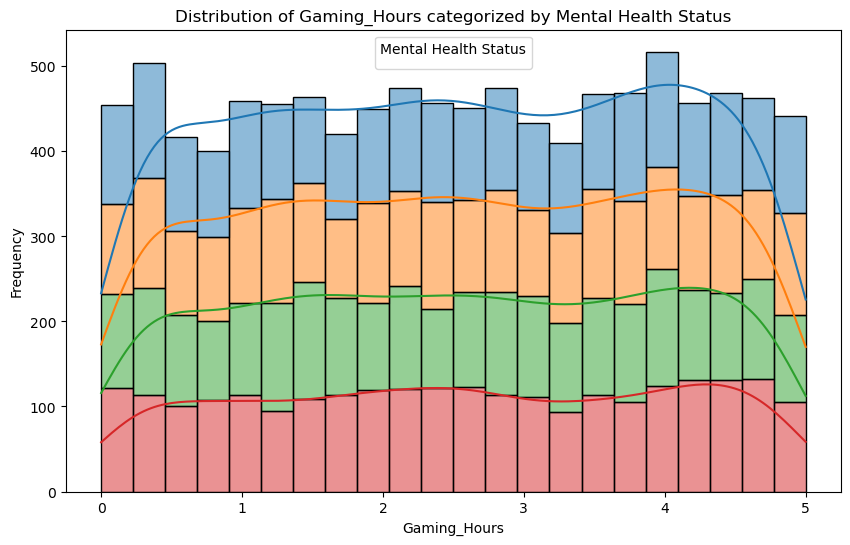

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


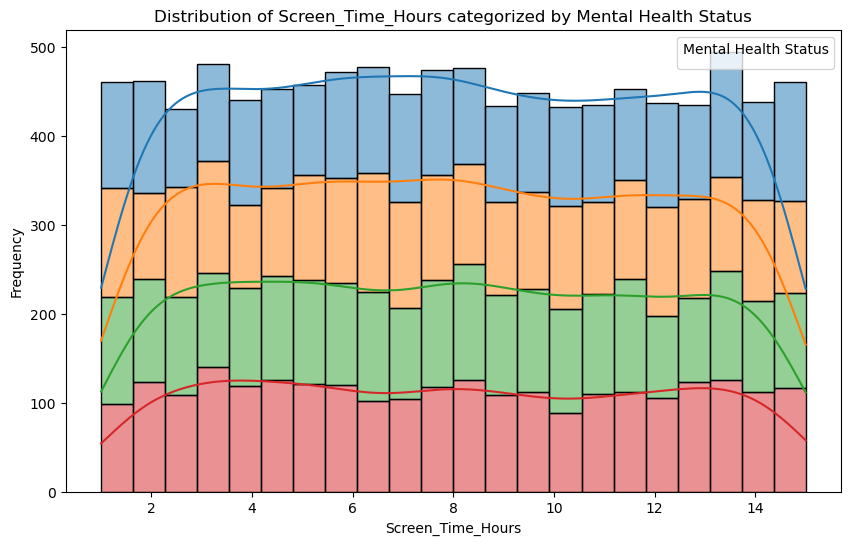

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


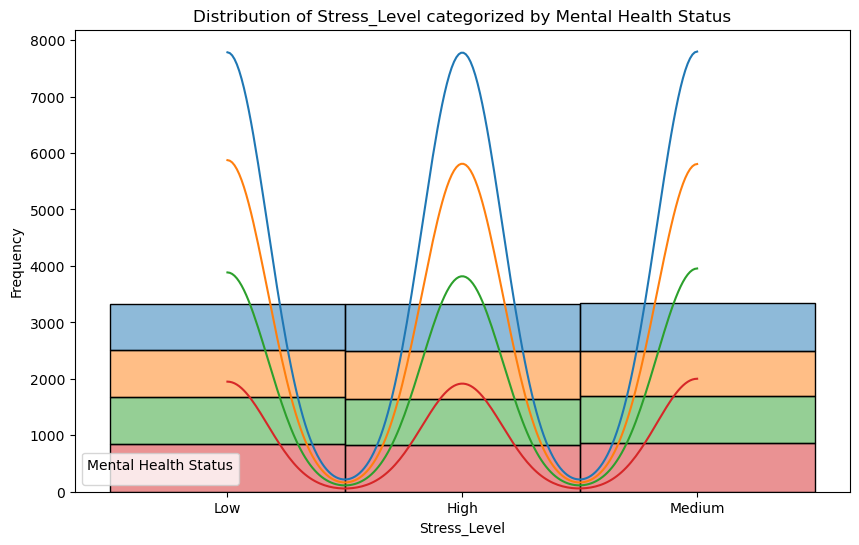

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


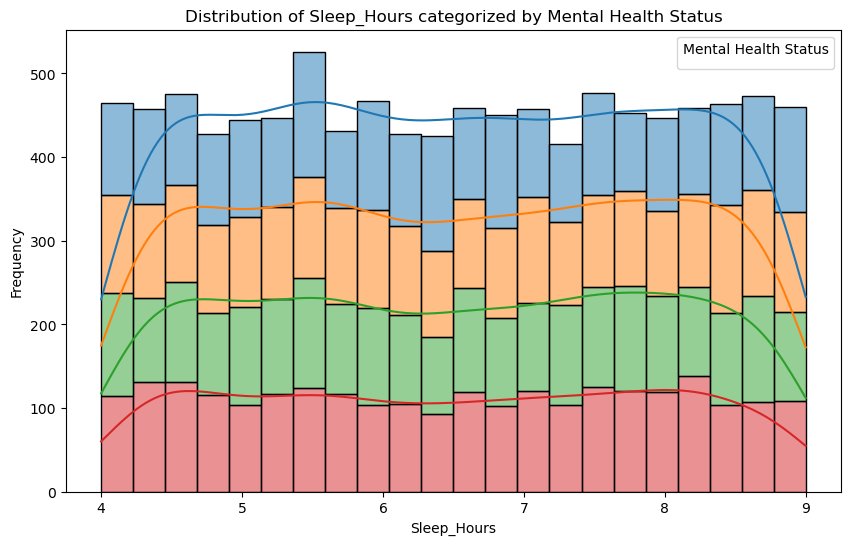

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


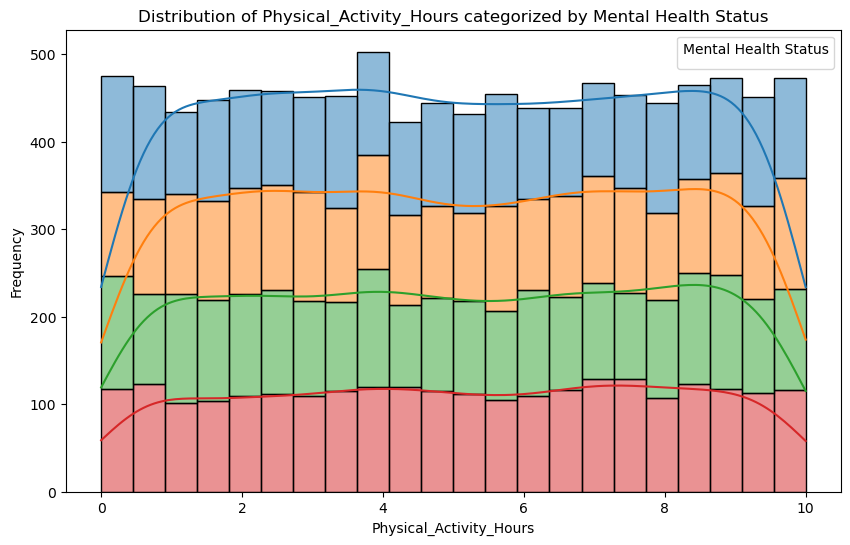

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


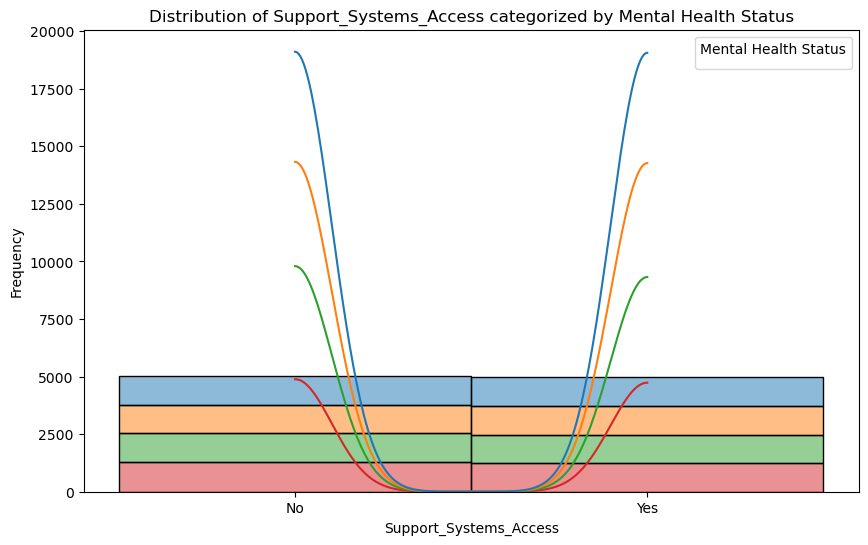

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


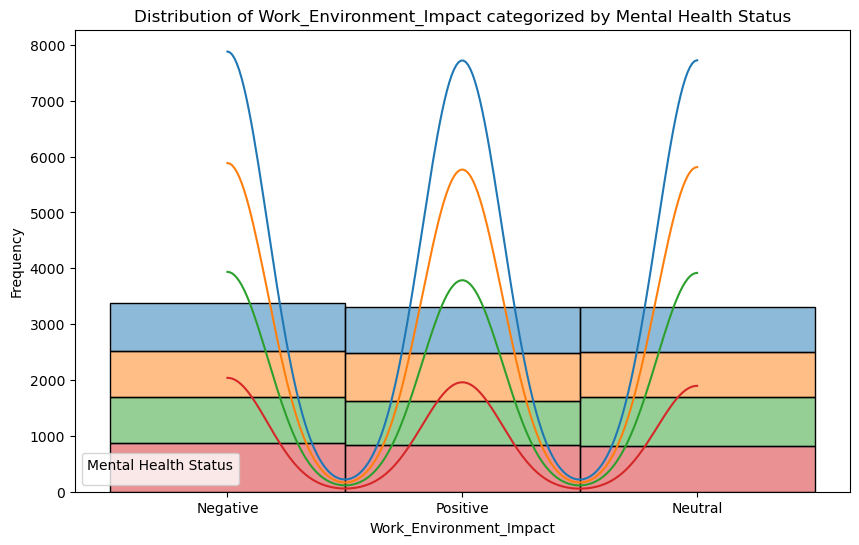

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


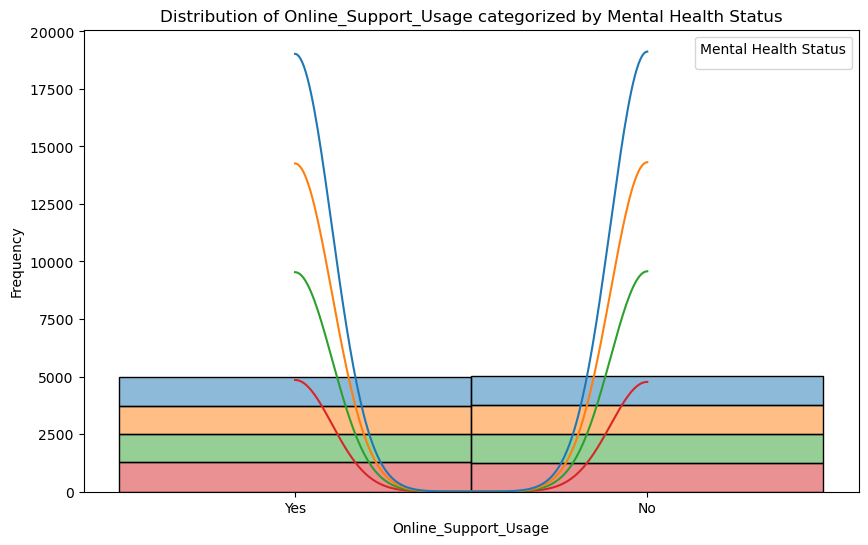

In [51]:


# List of numerical features to plot
features = [
    'Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours',
    'Gaming_Hours', 'Screen_Time_Hours', 'Stress_Level', 'Sleep_Hours',
    'Physical_Activity_Hours', 'Support_Systems_Access', 'Work_Environment_Impact', 
    'Online_Support_Usage'
]

# Loop through features and create histograms categorized by Mental_Health_Status
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df, x=feature, hue='Mental_Health_Status', multiple='stack', kde=True)
    plt.title(f'Distribution of {feature} categorized by Mental Health Status')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Mental Health Status')
    plt.show()


##Visualistation and Ouput

In [ ]:


# Drop the User_ID column
data = df.drop(columns=['User_ID'])

# Convert categorical columns to numeric
categorical_columns = [
    'Gender', 'Mental_Health_Status', 'Stress_Level', 
    'Support_Systems_Access', 'Work_Environment_Impact', 'Online_Support_Usage'
    'Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours',
    'Gaming_Hours', 'Screen_Time_Hours', 'Sleep_Hours', 
    'Physical_Activity_Hours'
]

# Use LabelEncoder for binary categorical columns or columns with few unique values
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])

# List of columns to normalize
features_to_normalize = [
    
]

# Initialize the scaler
scaler = StandardScaler()

# Normalize the selected numeric features
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

# Plot box plots for each normalized feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[features_to_normalize])
plt.xticks(rotation=45)
plt.title('Box Plot of Normalized Features')
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.show()


KeyError: "['Online_Support_UsageAge'] not in index"

##Data analysis

##Conclusion and recommendations